<a href="https://colab.research.google.com/github/YOUSSEF-BT/Data-science/blob/main/TP_Data_Analysis_Job_Categorisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ============================================
# ÉTAPE 1 : Importer les bibliothèques nécessaires
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# ============================================
# ÉTAPE 2 : Charger les données
# ============================================
# Lire le fichier CSV téléchargé
data = pd.read_csv("/content/job_categorisation.csv")

In [6]:
# Afficher les 5 premières lignes pour vérifier
print("Aperçu des données :")
print(data.head())

Aperçu des données :
     job_id                         job_title  \
0  74630583  Procurement Executive (Contract)   
1  74660602      Account Executive/ Assistant   
2  74679363              Purchasing Executive   
3  74657915              PURCHASING EXECUTIVE   
4  74662794           Accounts Assistant (AP)   

                               category  \
0  Manufacturing, Transport & Logistics   
1                            Accounting   
2  Manufacturing, Transport & Logistics   
3                           Engineering   
4                            Accounting   

                               subcategory                   role  \
0      Purchasing, Procurement & Inventory  procurement-executive   
1  Bookkeeping & Small Practice Accounting    executive-assistant   
2      Purchasing, Procurement & Inventory   purchasing-executive   
3                      Project Engineering   purchasing-executive   
4                         Accounts Payable     accounts-assistant   

       Upd

In [7]:
# ============================================
# QUESTION 3 : Répartition des catégories
# ============================================
print("\n" + "="*50)
print("QUESTION 3 : Répartition des catégories")
print("="*50)


QUESTION 3 : Répartition des catégories


In [8]:
# Compter combien d'emplois dans chaque catégorie
count_by_category = data['category'].value_counts()
print("Nombre d'emplois par catégorie :")
print(count_by_category)


Nombre d'emplois par catégorie :
category
Administration & Office Support           6420
Sales                                     4720
Accounting                                4454
Human Resources & Recruitment             3714
Manufacturing, Transport & Logistics      2940
Information & Communication Technology    2921
Marketing & Communications                2451
Engineering                               2425
Banking & Financial Services              2362
Call Centre & Customer Service            1465
Construction                              1283
Retail & Consumer Products                 876
Design & Architecture                      701
Real Estate & Property                     400
Hospitality & Tourism                      347
Advertising, Arts & Media                  333
Healthcare & Medical                       324
Legal                                      315
Consulting & Strategy                      270
Science & Technology                       255
Trades & Services 

In [9]:
# Créer un diagramme en secteurs (camembert)
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Répartition par catégorie (Diagramme en secteurs)')

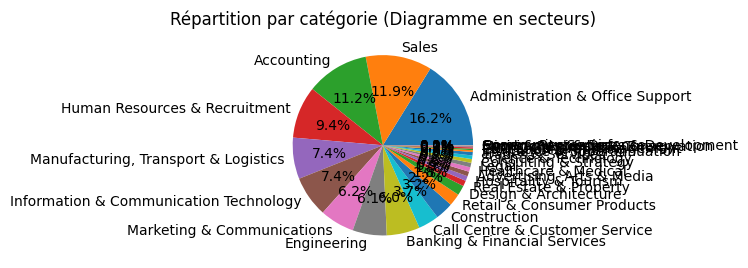

In [10]:
plt.subplot(1, 2, 1)  # Premier graphique à gauche
plt.pie(count_by_category.values, labels=count_by_category.index, autopct='%1.1f%%')
plt.title('Répartition par catégorie (Diagramme en secteurs)')

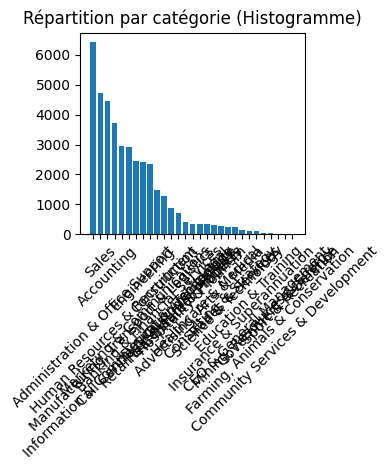

In [11]:
# Créer un histogramme (diagramme en barres)
plt.subplot(1, 2, 2)  # Deuxième graphique à droite
plt.bar(count_by_category.index, count_by_category.values)
plt.title('Répartition par catégorie (Histogramme)')
plt.xticks(rotation=45)  # Tourner les étiquettes pour mieux lire

plt.tight_layout()  # Ajuster l'espacement
plt.show()

In [12]:
# ============================================
# QUESTION 4 : Pourcentage des données manquantes
# ============================================
print("\n" + "="*50)
print("QUESTION 4 : Données manquantes")
print("="*50)


QUESTION 4 : Données manquantes


In [13]:
# Calculer le nombre de valeurs manquantes par colonne
missing_values = data.isnull().sum()


In [14]:
# Afficher seulement les colonnes qui ont des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

Valeurs manquantes par colonne :
role                  875
Updated category    10973
importance          19888
dtype: int64


In [15]:
# Calculer le pourcentage pour 'Updated category'
if 'Updated category' in data.columns:
    missing_percent = (data['Updated category'].isnull().sum() / len(data)) * 100
    print(f"\nPourcentage de valeurs manquantes dans 'Updated category' : {missing_percent:.2f}%")


Pourcentage de valeurs manquantes dans 'Updated category' : 27.64%


In [16]:
# ============================================
# QUESTION 5 : Encoder les catégories
# ============================================
print("\n" + "="*50)
print("QUESTION 5 : Encodage des catégories")
print("="*50)


QUESTION 5 : Encodage des catégories


In [17]:
# Méthode 1 : Label Encoding (chaque catégorie devient un nombre)
data['category_label'] = pd.factorize(data['category'])[0]
print("Label Encoding (catégorie → nombre) :")
print(data[['category', 'category_label']].head())


Label Encoding (catégorie → nombre) :
                               category  category_label
0  Manufacturing, Transport & Logistics               0
1                            Accounting               1
2  Manufacturing, Transport & Logistics               0
3                           Engineering               2
4                            Accounting               1


In [18]:
# Méthode 2 : One-Hot Encoding (créer des colonnes 0/1 pour chaque catégorie)
one_hot_encoded = pd.get_dummies(data['category'], prefix='cat')
print("\nOne-Hot Encoding (premières colonnes) :")
print(one_hot_encoded.head())


One-Hot Encoding (premières colonnes) :
   cat_Accounting  cat_Administration & Office Support  \
0           False                                False   
1            True                                False   
2           False                                False   
3           False                                False   
4            True                                False   

   cat_Advertising, Arts & Media  cat_Banking & Financial Services  \
0                          False                             False   
1                          False                             False   
2                          False                             False   
3                          False                             False   
4                          False                             False   

   cat_CEO & General Management  cat_Call Centre & Customer Service  \
0                         False                               False   
1                         False                

In [19]:
# ============================================
# QUESTION 6 : Encoder les sous-catégories
# ============================================
print("\n" + "="*50)
print("QUESTION 6 : Encodage des sous-catégories")
print("="*50)


QUESTION 6 : Encodage des sous-catégories


In [21]:
# Frequency Encoding : remplacer chaque sous-catégorie par sa fréquence
if 'subcategory' in data.columns:
    # Compter combien de fois chaque sous-catégorie apparaît
    freq = data['subcategory'].value_counts()

    # Remplacer chaque sous-catégorie par sa fréquence
    data['subcategory_freq'] = data['subcategory'].map(freq)

    print("Frequency Encoding :")
    print(data[['subcategory', 'subcategory_freq']].head())

Frequency Encoding :
                               subcategory  subcategory_freq
0      Purchasing, Procurement & Inventory              1162
1  Bookkeeping & Small Practice Accounting              1164
2      Purchasing, Procurement & Inventory              1162
3                      Project Engineering                18
4                         Accounts Payable               102


In [22]:
# ============================================
# QUESTION 7 : Gérer les valeurs manquantes
# ============================================
print("\n" + "="*50)
print("QUESTION 7 : Traitement des valeurs manquantes")
print("="*50)

# Copier les données pour ne pas modifier l'original
data_clean = data.copy()

# Remplir les valeurs manquantes avec la valeur précédente (ffill)
if 'Updated category' in data_clean.columns:
    data_clean['Updated category'] = data_clean['Updated category'].fillna(method='ffill')
    print("Valeurs manquantes remplies avec la méthode 'ffill'")


QUESTION 7 : Traitement des valeurs manquantes
Valeurs manquantes remplies avec la méthode 'ffill'


/tmp/ipython-input-1042968939.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_clean['Updated category'] = data_clean['Updated category'].fillna(method='ffill')


In [23]:
# ============================================
# QUESTION 9 : Colonnes avec valeurs manquantes
# ============================================
print("\n" + "="*50)
print("QUESTION 9 : Identifier toutes les colonnes avec valeurs manquantes")
print("="*50)

# Trouver toutes les colonnes avec au moins une valeur manquante
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]
print(f"Colonnes avec valeurs manquantes : {cols_with_missing}")

# Pour chaque colonne, afficher le pourcentage de valeurs manquantes
for col in cols_with_missing:
    percent = (data[col].isnull().sum() / len(data)) * 100
    print(f"- {col} : {percent:.2f}% manquantes")


QUESTION 9 : Identifier toutes les colonnes avec valeurs manquantes
Colonnes avec valeurs manquantes : ['role', 'Updated category', 'importance']
- role : 2.20% manquantes
- Updated category : 27.64% manquantes
- importance : 50.10% manquantes


In [24]:
# ============================================
# QUESTION 10 : Supprimer les doublons
# ============================================
print("\n" + "="*50)
print("QUESTION 10 : Recherche et suppression des doublons")
print("="*50)

# Compter le nombre de lignes avant suppression
avant = len(data_clean)

# Supprimer les lignes avec le même job_title
data_clean = data_clean.drop_duplicates(subset=['job_title'])

# Compter le nombre de lignes après suppression
apres = len(data_clean)

print(f"Nombre de lignes avant suppression des doublons : {avant}")
print(f"Nombre de lignes après suppression des doublons : {apres}")
print(f"Nombre de doublons supprimés : {avant - apres}")


QUESTION 10 : Recherche et suppression des doublons
Nombre de lignes avant suppression des doublons : 39695
Nombre de lignes après suppression des doublons : 23521
Nombre de doublons supprimés : 16174


In [25]:
# ============================================
# QUESTION 11 : Normaliser les noms
# ============================================
print("\n" + "="*50)
print("QUESTION 11 : Normalisation du texte")
print("="*50)

# Mettre en minuscules et supprimer les espaces inutiles
if 'job_title' in data_clean.columns:
    data_clean['job_title_clean'] = data_clean['job_title'].str.lower().str.strip()
    print("Job titles normalisés (exemples) :")
    print(data_clean[['job_title', 'job_title_clean']].head())

if 'role' in data_clean.columns:
    data_clean['role_clean'] = data_clean['role'].str.lower().str.strip()
    print("\nRoles normalisés (exemples) :")
    print(data_clean[['role', 'role_clean']].head())


QUESTION 11 : Normalisation du texte
Job titles normalisés (exemples) :
                          job_title                   job_title_clean
0  Procurement Executive (Contract)  procurement executive (contract)
1      Account Executive/ Assistant      account executive/ assistant
2              Purchasing Executive              purchasing executive
3              PURCHASING EXECUTIVE              purchasing executive
4           Accounts Assistant (AP)           accounts assistant (ap)

Roles normalisés (exemples) :
                    role             role_clean
0  procurement-executive  procurement-executive
1    executive-assistant    executive-assistant
2   purchasing-executive   purchasing-executive
3   purchasing-executive   purchasing-executive
4     accounts-assistant     accounts-assistant


In [26]:
# ============================================
# RÉSUMÉ FINAL
# ============================================
print("\n" + "="*50)
print("RÉSUMÉ FINAL")
print("="*50)
print(f"Dimensions initiales des données : {data.shape}")
print(f"Dimensions après nettoyage : {data_clean.shape}")
print("\nColonnes disponibles :")
print(list(data_clean.columns))
print("\nAnalyse terminée avec succès !")


RÉSUMÉ FINAL
Dimensions initiales des données : (39695, 9)
Dimensions après nettoyage : (23521, 11)

Colonnes disponibles :
['job_id', 'job_title', 'category', 'subcategory', 'role', 'Updated category', 'importance', 'category_label', 'subcategory_freq', 'job_title_clean', 'role_clean']

Analyse terminée avec succès !
